In [46]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg")

In [43]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

E:\Anaconda2\envs\python3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Anaconda2\envs\python3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
data_train_raw = pd.read_csv('data/train.csv')
data_train = data_train_raw.copy(deep = True)
data_train.drop(['PassengerId'], axis=1, inplace=True)

data_test_raw = pd.read_csv('data/test.csv')
data_test = data_test_raw.copy(deep = True)
data_test_passenger_id = data_test.PassengerId
data_test.drop(['PassengerId'], axis=1, inplace=True)

data_combined = [data_train, data_test]

In [5]:
data_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data_train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
data_test_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
data_test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
print('Train Data columns with null values:\n', data_train.isnull().sum())
print("-"*20)
print('Test Data columns with null values:\n', data_test.isnull().sum())

Train Data columns with null values:
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
--------------------
Test Data columns with null values:
 Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [12]:
# Discrete Variable Correlation by Survival using
# group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
columns = data_train.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Fare', 'Age']).values
print(columns)
for x in columns:
    print(data_train[x].dtype)
    if data_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data_train[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*20, '\n')

['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked']
int64
Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------- 

object
Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------- 

int64
Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------- 

int64
Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
-------------------- 

object
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
-------------------- 



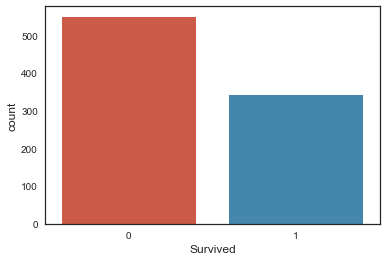

In [13]:
sns.countplot(x='Survived', data=data_train)

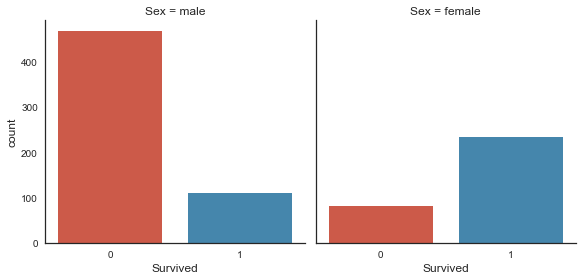

In [14]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=data_train)

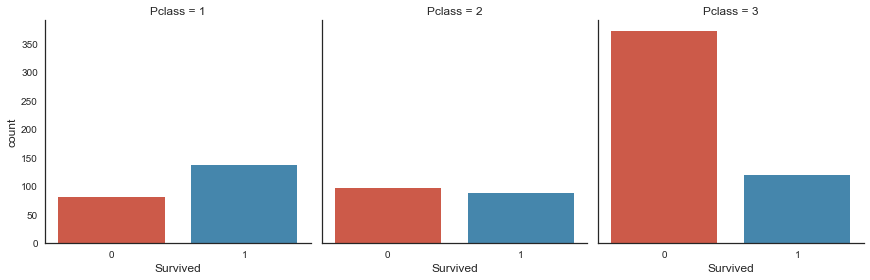

In [15]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=data_train)

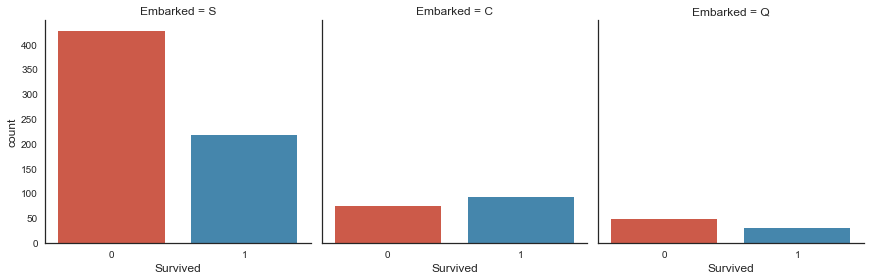

In [16]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=data_train)

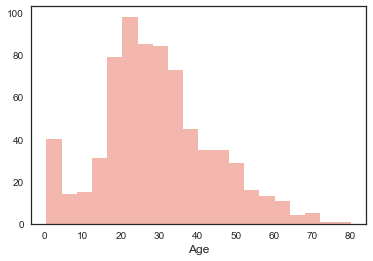

In [17]:
data_train_age = data_train.dropna(subset=['Age'])
sns.distplot(data_train_age.Age, kde=False)

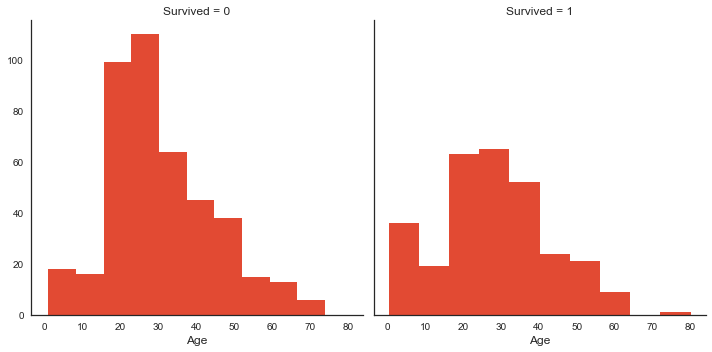

In [18]:
g = sns.FacetGrid(data_train_age, col='Survived', size=5)
g.map(plt.hist, 'Age', bins=10)

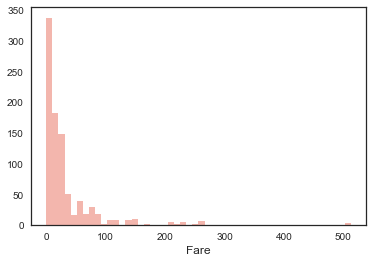

In [19]:
data_train_fare = data_train.dropna(subset=['Fare'])
sns.distplot(data_train_fare.Fare, kde=False)

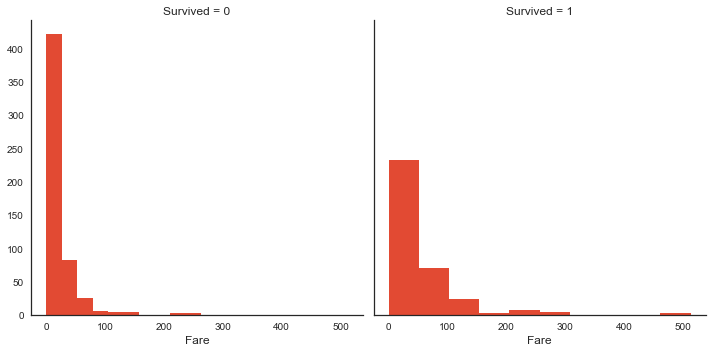

In [20]:
g = sns.FacetGrid(data_train_fare, col='Survived', size=5)
g.map(plt.hist, 'Fare', bins=10)

In [21]:
for data in data_combined:
    data.Fare.fillna(data.Fare.mean(), inplace=True)
    data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)
    data.Cabin.fillna('U', inplace=True)
    # mapping each Cabin value with the cabin letter
    data['Cabin'] = data['Cabin'].map(lambda c : c[0].upper())
    
print(data_train.isnull().sum())
print("-"*20)
print(data_test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64
--------------------
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     0
dtype: int64


In [22]:
for data in data_combined:
    # we extract the title from each name
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    data['Title'] = data.Title.map(Title_Dictionary)
    data.drop(['Name'], axis=1, inplace=True)

In [23]:
for data in data_combined:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    data['IsAlone'] = 1 # initialize to yes/1 is alone
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0
    data['FareBin'] = pd.qcut(data['Fare'], 4)
    data.drop(['SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

In [24]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = filter(lambda t : not t.isdigit(), ticket)
    ticket = list(ticket)
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
    
for data in data_combined:
    # Extracting dummy variables from tickets:
    data['Ticket'] = data['Ticket'].map(cleanTicket)

In [25]:
data_train.head()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
0,0,3,male,22.0,A5,U,S,Mr,2,0,"(-0.001, 7.91]"
1,1,1,female,38.0,PC,C,C,Mrs,2,0,"(31.0, 512.329]"
2,1,3,female,26.0,STONO2,U,S,Miss,1,1,"(7.91, 14.454]"
3,1,1,female,35.0,XXX,C,S,Mrs,2,0,"(31.0, 512.329]"
4,0,3,male,35.0,XXX,U,S,Mr,1,1,"(7.91, 14.454]"


In [26]:
label = LabelEncoder()
for data in data_combined:    
    data['Sex'] = label.fit_transform(data['Sex'])
    data['Ticket'] = label.fit_transform(data['Ticket'])
    data['Cabin'] = label.fit_transform(data['Cabin'])
    data['Embarked'] = label.fit_transform(data['Embarked'])
    data['Title'] = label.fit_transform(data['Title'])
    data['FareBin'] = label.fit_transform(data['FareBin'])

In [27]:
data_train.head()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
0,0,3,1,22.0,1,8,2,2,2,0,0
1,1,1,0,38.0,10,2,0,3,2,0,3
2,1,3,0,26.0,26,8,2,1,1,1,1
3,1,1,0,35.0,30,2,2,3,2,0,3
4,0,3,1,35.0,30,8,2,2,1,1,1


In [28]:
data_train.describe()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,25.303030,6.716049,1.536476,1.903479,1.904602,0.602694,1.497194
std,0.486592,0.836071,0.477990,14.526497,9.110691,2.460739,0.791503,0.807061,1.613459,0.489615,1.118156
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,28.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.500000
50%,0.000000,3.000000,1.000000,28.000000,30.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,30.000000,8.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,30.000000,8.000000,2.000000,5.000000,11.000000,1.000000,3.000000


In [29]:
guess_ages = np.zeros((2,6))

for data in data_combined:
    for i in range(0, 2): # Sex
        for j in range(0, 6): # Title
            guess_df = data[(data['Sex'] == i) & \
                                  (data['Title'] == j)]['Age'].dropna()

            age_guess = guess_df.median()

            if age_guess > 0:
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 6):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j),\
                    'Age'] = guess_ages[i,j]

    data['Age'] = data['Age'].astype(int)
    
data_train.describe()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,25.948373,25.303030,6.716049,1.536476,1.903479,1.904602,0.602694,1.497194
std,0.486592,0.836071,0.477990,16.530178,9.110691,2.460739,0.791503,0.807061,1.613459,0.489615,1.118156
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,17.000000,28.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.500000
50%,0.000000,3.000000,1.000000,27.000000,30.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,30.000000,8.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,30.000000,8.000000,2.000000,5.000000,11.000000,1.000000,3.000000


In [30]:
for data in data_combined:
    data['AgeBin'] = pd.cut(data['Age'], 5)
    data.drop(['Age'], axis=1, inplace=True)
    
data_train.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
0,0,3,1,1,8,2,2,2,0,0,"(16.0, 32.0]"
1,1,1,0,10,2,0,3,2,0,3,"(32.0, 48.0]"
2,1,3,0,26,8,2,1,1,1,1,"(16.0, 32.0]"
3,1,1,0,30,2,2,3,2,0,3,"(32.0, 48.0]"
4,0,3,1,30,8,2,2,1,1,1,"(32.0, 48.0]"


In [31]:
label = LabelEncoder()
for data in data_combined:    
    data['AgeBin'] = label.fit_transform(data['AgeBin'])

data_train.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
0,0,3,1,1,8,2,2,2,0,0,1
1,1,1,0,10,2,0,3,2,0,3,2
2,1,3,0,26,8,2,1,1,1,1,1
3,1,1,0,30,2,2,3,2,0,3,2
4,0,3,1,30,8,2,2,1,1,1,2


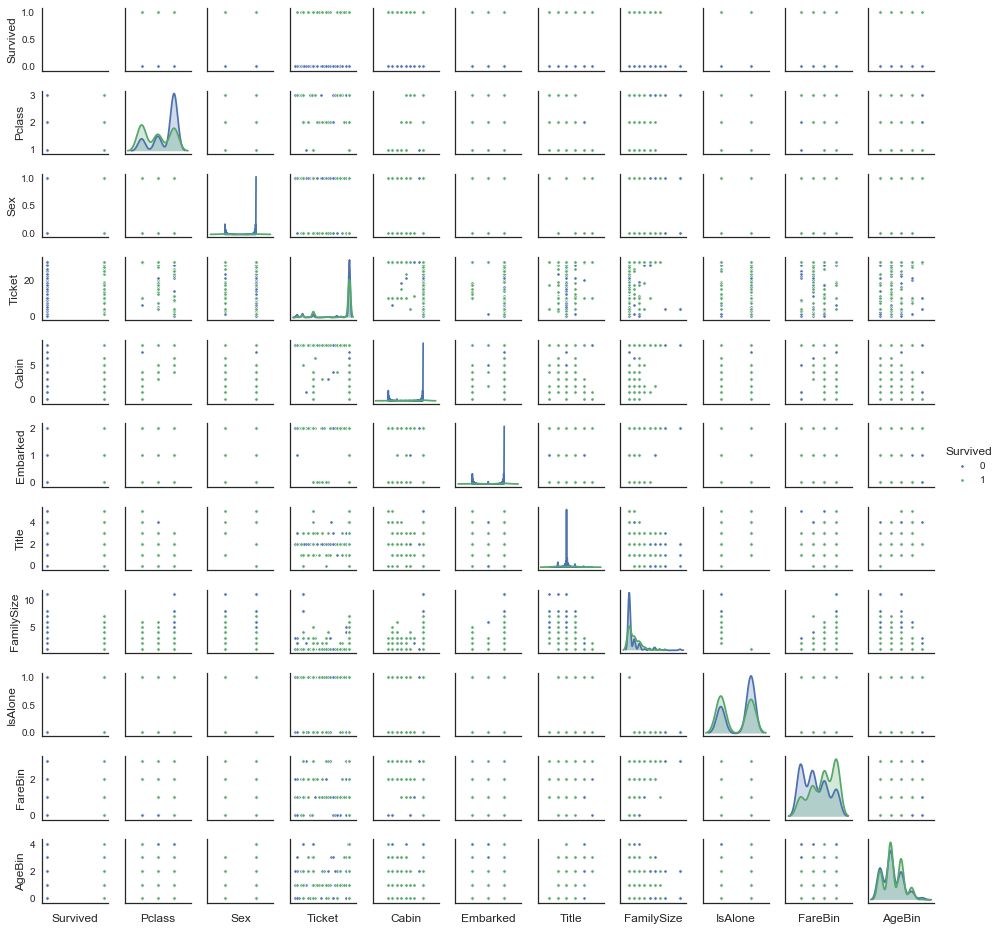

In [32]:
#pair plots of entire dataset
pp = sns.pairplot(data_train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

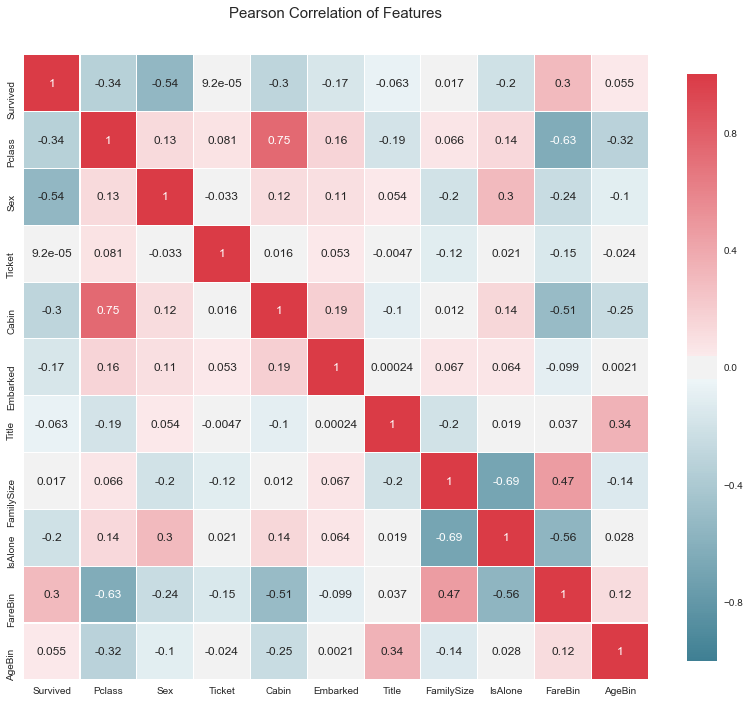

In [33]:
# correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_train)

In [34]:
train, test, target = data_train.drop(['Survived'], axis=1), data_test, data_train_raw.Survived

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

In [36]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

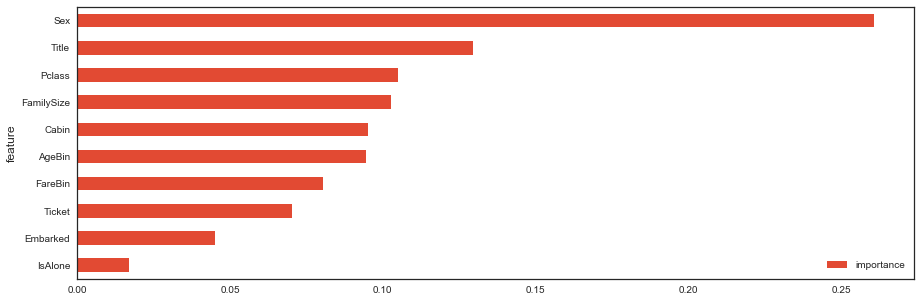

In [37]:
features.plot(kind='barh', figsize=(15, 5))

In [38]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 4)

In [39]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 4)

In [40]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [41]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [10, 50, 100],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(target, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else:
    parameters = {'bootstrap': True, 'min_samples_split': 3, 'n_estimators': 10,
                  'max_features': 'sqrt', 'max_depth': 8, 'min_samples_leaf': 3}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, target)
    print(compute_score(model, train, target, scoring='accuracy'))

0.813757422103


In [42]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = data_test_raw.PassengerId
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('data/predictions/output.csv',index=False)